In [131]:
import pandas as pd

df = pd.read_csv("processed_data.csv")
df

,HOUSEID,ANNMILES,GASUSGE,HighestEDUC,TAXISERVICE,RIDESHARE22,ESCOOTERUSED,PTUSED,MCTRANSIT,WALKTRANSIT,...,URBAN,URBANSIZE,URBRUR,PPT517,YOUNGCHILD,RESP_CNT,URBRUR_2010,TDAYDATE,WRKCOUNT,STRATUMID
0,9000013002,12000,408.258158,7,0,0,0,0,0,13,...,1,4,1,2,0,4,1,202202,1,1021
1,9000013016,10000,356.835885,6,0,0,0,0,0,7,...,1,2,1,0,0,2,1,202202,2,1021
2,9000013039,5000,171.387563,6,0,0,0,0,0,8,...,1,4,1,2,0,4,1,202201,1,1021
3,9000013041,5000,173.118751,6,0,0,0,0,0,0,...,1,3,1,0,0,1,1,202201,1,1021
4,9000013042,70020,2414.157750,8,0,3,0,8,0,9,...,1,4,1,0,1,2,1,202202,2,1021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7161,9000218006,11000,374.625041,7,0,0,0,0,0,0,...,1,3,1,2,0,3,1,202212,1,1031
7162,9000218013,3000,102.395445,7,0,0,0,0,0,3,...,1,1,1,0,0,2,1,202301,0,1031
7163,9000218021,12100,421.380431,6,0,0,0,0,0,0,...,4,6,2,0,0,1,2,202212,0,1032
7164,9000218034,10000,482.619553,2,0,0,0,0,0,0,...,4,6,2,0,0,2,2,202212,0,1032


In [132]:
import numpy as np

print("Mean of the column 'GASUSGE':", df['GASUSGE'].mean())

# Step 1: Calculate the threshold value
threshold = df['GASUSGE'].quantile(0.9)

# Step 2: Create a new column and initialize it with 0
df['SUPERUSER'] = 0

# Step 3: Update the SUPERUSER column for superuser houses
df.loc[df['GASUSGE'] >= threshold, 'SUPERUSER'] = 1

df


Mean of the column 'GASUSGE': 958.7271239022903


,HOUSEID,ANNMILES,GASUSGE,HighestEDUC,TAXISERVICE,RIDESHARE22,ESCOOTERUSED,PTUSED,MCTRANSIT,WALKTRANSIT,...,URBANSIZE,URBRUR,PPT517,YOUNGCHILD,RESP_CNT,URBRUR_2010,TDAYDATE,WRKCOUNT,STRATUMID,SUPERUSER
0,9000013002,12000,408.258158,7,0,0,0,0,0,13,...,4,1,2,0,4,1,202202,1,1021,0
1,9000013016,10000,356.835885,6,0,0,0,0,0,7,...,2,1,0,0,2,1,202202,2,1021,0
2,9000013039,5000,171.387563,6,0,0,0,0,0,8,...,4,1,2,0,4,1,202201,1,1021,0
3,9000013041,5000,173.118751,6,0,0,0,0,0,0,...,3,1,0,0,1,1,202201,1,1021,0
4,9000013042,70020,2414.157750,8,0,3,0,8,0,9,...,4,1,0,1,2,1,202202,2,1021,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7161,9000218006,11000,374.625041,7,0,0,0,0,0,0,...,3,1,2,0,3,1,202212,1,1031,0
7162,9000218013,3000,102.395445,7,0,0,0,0,0,3,...,1,1,0,0,2,1,202301,0,1031,0
7163,9000218021,12100,421.380431,6,0,0,0,0,0,0,...,6,2,0,0,1,2,202212,0,1032,0
7164,9000218034,10000,482.619553,2,0,0,0,0,0,0,...,6,2,0,0,2,2,202212,0,1032,0


In [133]:
import torch
import torch.nn as nn

data = {}

if(torch.cuda.is_available()):
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

neural_net = nn.Sequential(nn.Linear(1, 100)
                           ,nn.ReLU()
                           ,nn.Linear(100, 1)
                           ,nn.Sigmoid()).to(device)

exclude = ['GASUSGE', 'SUPERUSER', 'ANNMILES', 'HOUSEID', 'TDAYDATE', 'STRATUMID']


for column in df:
    if column not in exclude:
        X = torch.tensor(df[column].values, dtype=torch.float32).to(device).unsqueeze(1)
        y = torch.tensor(df['SUPERUSER'].values, dtype=torch.float32).to(device).unsqueeze(1)

        x_train = X[:int(0.8*len(X))]
        y_train = y[:int(0.8*len(y))]
        x_test = X[int(0.8*len(X)):]
        y_test = y[int(0.8*len(y)):]

        criterion = nn.MSELoss()
        optimizer = torch.optim.Adam(neural_net.parameters(), lr=0.01)

        for epoch in range(1000):
            optimizer.zero_grad()
            y_pred = neural_net(x_train)
            loss = criterion(y_pred, y_train)
            loss.backward()
            optimizer.step()

        test_pred = neural_net(x_test)
        accuracy = x_test[torch.round(test_pred) == y_test].shape[0]

        data[column] = (loss.item(), accuracy/x_test.shape[0])
        print(column)
        print("Loss:", loss.item())    
        print("Test Percentage:", accuracy/x_test.shape[0])

HighestEDUC
Loss: 0.08727721869945526
Test Percentage: 0.8877266387726639
TAXISERVICE
Loss: 0.08744407445192337
Test Percentage: 0.8877266387726639
RIDESHARE22
Loss: 0.0873790830373764
Test Percentage: 0.8877266387726639
ESCOOTERUSED
Loss: 0.08747759461402893
Test Percentage: 0.8877266387726639
PTUSED
Loss: 0.08796264976263046
Test Percentage: 0.8877266387726639
MCTRANSIT
Loss: 0.08726311475038528
Test Percentage: 0.8877266387726639
WALKTRANSIT
Loss: 0.0875338762998581
Test Percentage: 0.8877266387726639
BIKETRANSIT
Loss: 0.08750466257333755
Test Percentage: 0.8877266387726639
EMPLOYMENT2
Loss: 0.09546080976724625
Test Percentage: 0.8877266387726639


KeyboardInterrupt: 

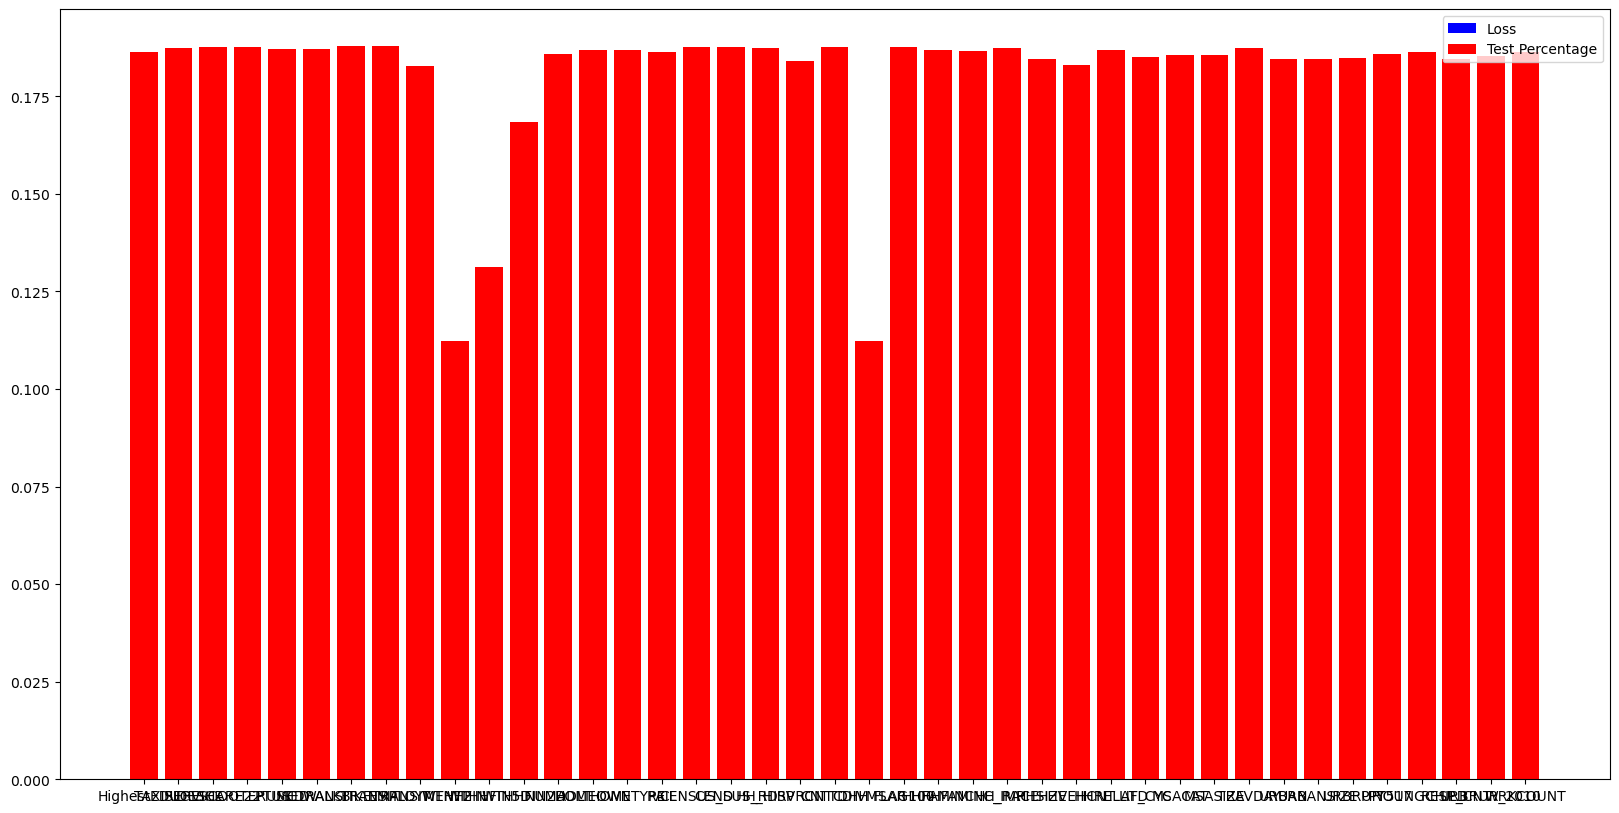

In [ ]:
k, v = data.keys(), data.values()
losses, test_percentages = zip(*v)

plt.figure(figsize=(20, 10))

plt.bar(k, losses, color='blue', label='Loss')
plt.bar(k, test_percentages, color='red', label='Test Percentage')
plt.legend()
plt.show()

In [ ]:
for k, v in data.items():
    print(k, v)

HighestEDUC (0.08729061484336853, 0.18641707301139832)
TAXISERVICE (0.08750064671039581, 0.18727031350135803)
RIDESHARE22 (0.0874631330370903, 0.18762607872486115)
ESCOOTERUSED (0.08758511394262314, 0.187531515955925)
PTUSED (0.08748786896467209, 0.1871803104877472)
MCTRANSIT (0.08750537037849426, 0.18702833354473114)
WALKTRANSIT (0.08748102933168411, 0.18786731362342834)
BIKETRANSIT (0.08755866438150406, 0.18790556490421295)
EMPLOYMENT2 (0.08624208718538284, 0.18270857632160187)
WTHHFIN (0.09699930250644684, 0.11227335780858994)
WTHHFIN5D (0.09404218196868896, 0.13115856051445007)
WTHHFIN2D (0.09054302424192429, 0.1684216856956482)
NUMADLT (0.08666781336069107, 0.1857309639453888)
HOMEOWN (0.0871739387512207, 0.1868584007024765)
HOMETYPE (0.0875273197889328, 0.18689247965812683)
RAIL (0.08744306117296219, 0.18637198209762573)
CENSUS_D (0.0875818133354187, 0.1876012086868286)
CENSUS_R (0.08758232742547989, 0.1875547170639038)
HH_HISP (0.08734866976737976, 0.18726366758346558)
DRVRCNT (